## WAFFLE CHART

In [3]:
import pandas as pd
import numpy as np

In [4]:
df_can = pd.read_excel('Canada.xlsx', sheet_name ='Canada by Citizenship', skiprows= range(20), skipfooter=2)

In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Coverage'], axis = 1, inplace=True)
df_can = df_can.rename(columns=({'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}))
df_can.set_index('Country', inplace=True)
df_can.columns = list(map(str, df_can.columns))
df_can['Total'] = df_can.sum(axis=1)
df_can.head(2)
years=list(map(str, range(1980, 2014)))

In [6]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.4


In [7]:
# let's create a new dataframe for these three countries 
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# let's take a look at our dataframe
df_dsn

,Type,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Immigrants,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,...,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3901.0
Norway,Immigrants,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,...,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2327.0
Sweden,Immigrants,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,...,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5866.0


Step 1. The first step into creating a waffle chart is determing the proportion of each category with respect to the total.

In [8]:
total_values = df_dsn['Total'].sum()
category_proportions = df_dsn['Total']/total_values
pd.DataFrame({'Category Proportion': category_proportions})

,Category Proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


Step 2. The second step is defining the overall size of the waffle chart.

In [9]:
width = 40
height = 10
total_num_of_tiles = width * height
print(f'Total number of tiles is {total_num_of_tiles}')

Total number of tiles is 400


Step 3. The third step is using the proportion of each category to determe it respective number of tiles

In [10]:
tiles_per_category = (category_proportions * total_num_of_tiles).round().astype(int)

# print out number of tiles per category
pd.DataFrame({"Number of tiles": tiles_per_category})

,Number of tiles
Country,
Denmark,129
Norway,77
Sweden,194


Step 4. The fourth step is creating a matrix that resembles the waffle chart and populating it.

In [11]:
waffle_chart = np.zeros((height, width), dtype= np.uint)

category_index = 0 
tiles_index = 0
for col in range(width):
        for row in range(height):
            tiles_index +=1
            
            if tiles_index > sum(tiles_per_category[0:category_index]):
                category_index +=1
            waffle_chart[row, col]=category_index
print('waffle chart populated')
                
            

waffle chart populated


In [12]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Step 5. Map the waffle chart matrix into a visual.

<Figure size 432x288 with 0 Axes>

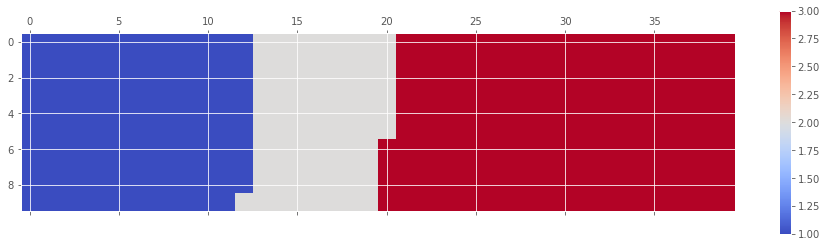

In [13]:
fig = plt.figure()
#use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()
plt.show()

Step 6. Prettify the chart.

<Figure size 432x288 with 0 Axes>

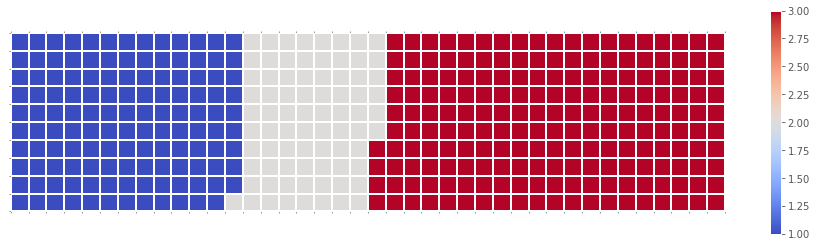

In [14]:
fig= plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()


#to add axes
ax = plt.gca()
#set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
ax.set_yticks(np.arange(-.5, (height), 1), minor =True)
# add gridlines based on minor ticks
ax.grid(which = 'minor', color = 'w', linestyle ='-', linewidth =2)

plt.xticks([])
plt.yticks([])
plt.show()

Step 7. Create a legend and add it to chart.

<Figure size 432x288 with 0 Axes>

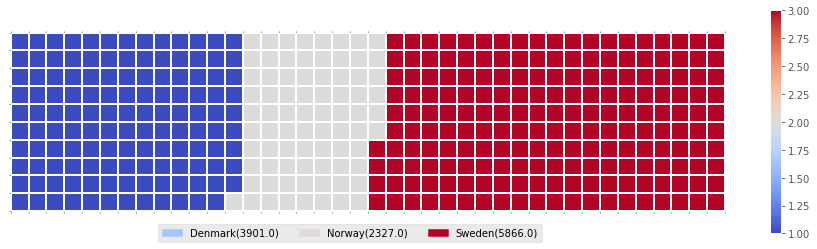

In [15]:
fig = plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
#get axis
ax = plt.gca()
#set minors
ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
ax.set_yticks(np.arange(-.5, (height), 1), minor = True)
#add gridlines based on minorticks
ax.grid(which = 'minor', color = 'w', linestyle = '-', linewidth = 2)

plt.xticks([])
plt.yticks([])
# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum)-1]
#create legend
legend_handles = []
for i , category in enumerate(df_dsn.index.values):
    label_str = category + '('+ str(df_dsn['Total'][i]) +')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label = label_str))
#add legend to chart    
plt.legend(handles = legend_handles,
          loc ='lower center',
          ncol = len(df_dsn.index.values),
          bbox_to_anchor=(0., -0.2, 0.95, .1))
plt.show()



Now it would very inefficient to repeat these seven steps every time we wish to create a waffle chart. So let's combine all seven steps into one function called create_waffle_chart. This function would take the following parameters as input:

> 1. categories: Unique categories or classes in dataframe.
> 2. values: Values corresponding to categories or classes.
> 3. height: Defined height of waffle chart.
> 4. width: Defined width of waffle chart.
> 5. colormap: Colormap class
> 6. value_sign: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. value_sign has a default value of empty string.

In [16]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign =''):
    #compute the proportion of each category with respect to the total
    total_value = sum (values)
    category_proportions = [(float(value)/total_value) for value in values]
    
    #compute the total number of tiles
    total_num_of_tiles = width * height
    print(f'the total number of tiles is {total_num_of_tiles}')
    
    #compute the number of tiles per each category
    category_per_tile =[round(proportion * total_num_of_tiles) for proportion in category_proportions]
    
    #print out number of tiles per category
    for i , tiles in enumerate(category_per_tile):
        print(df_dsn.index.values[i] +':' +str(tiles))

    waffle_chart = np.zeros((height, width))
    category_index = 0
    tiles_index = 0
    for col in range(width):
        for row in range(height):
            tiles_index += 1
            if tiles_index > sum(category_per_tile[0:category_index]):
                category_index+=1
            waffle_chart[row, col] = category_index
    fig = plt.figure()
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap = colormap)
    plt.colorbar()
    
    
    ax = plt.gca()
    ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor = True)
    
    ax.grid(which = 'minor', color = 'w', linestyle = '-', linewidth = 2)
    
    
    plt.xticks([])
    plt.yticks([])
    
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum)-1]
    
    legend_handles =[]
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + '('+ str(values[i]) + value_sign + ')'
        else:
            label_str = category + '(' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color = color_val, label = label_str))
    plt.legend(handles = legend_handles,
              loc = 'lower center',
              ncol = len(categories),
              bbox_to_anchor = (0., -0.2, 0.95, .1))
    plt.show()
                                                       

Now to create a waffle chart, all we have to do is call the function create_waffle_chart. Let's define the input parameters:

In [17]:
categories = df_dsn.index.values
values = df_dsn['Total']
colormap = plt.cm.coolwarm
width = 60
height = 20


the total number of tiles is 1200
Denmark:387
Norway:231
Sweden:582


<Figure size 432x288 with 0 Axes>

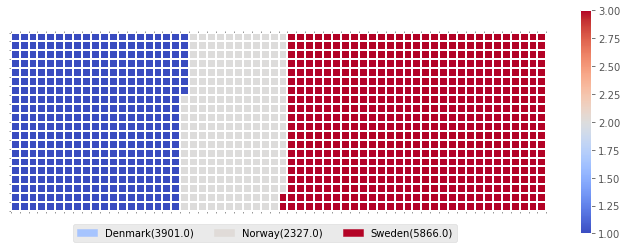

In [18]:
create_waffle_chart(categories, values, height, width, colormap)

## WORD CLOUDS

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

In [19]:
! pip3 install wordcloud==1.8.1


In [20]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
print('wordcloud is sucessfully installed and imported')

wordcloud is sucessfully installed and imported


analyze a short novel written by Lewis Carroll titled Alice's Adventures in Wonderland. Let's go ahead and download a .txt file of the novel.

In [21]:
import urllib

alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode('utf-8')

In [22]:
stopwords = set(STOPWORDS)

In [23]:

#generating a word cloud object nd using only the first 2000 words in the novel
alice_wc = WordCloud(
background_color = 'white',
max_words =2000,
stopwords = stopwords)

# generating the word cloud
alice_wc.generate(alice_novel)

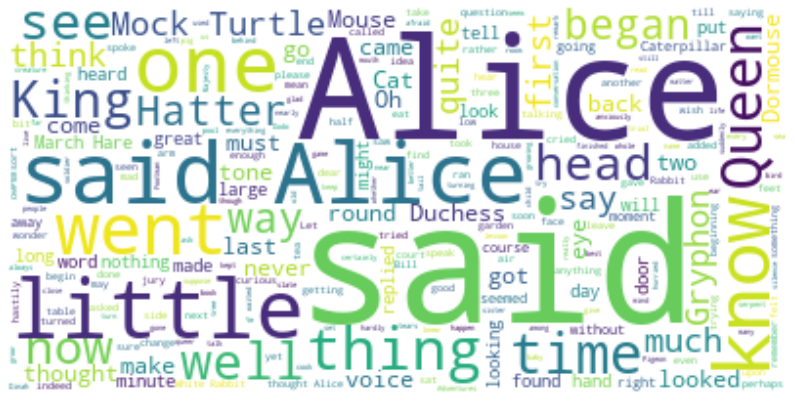

In [24]:
fig = plt.figure(figsize= (14, 18))
plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Much better! However, said isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.

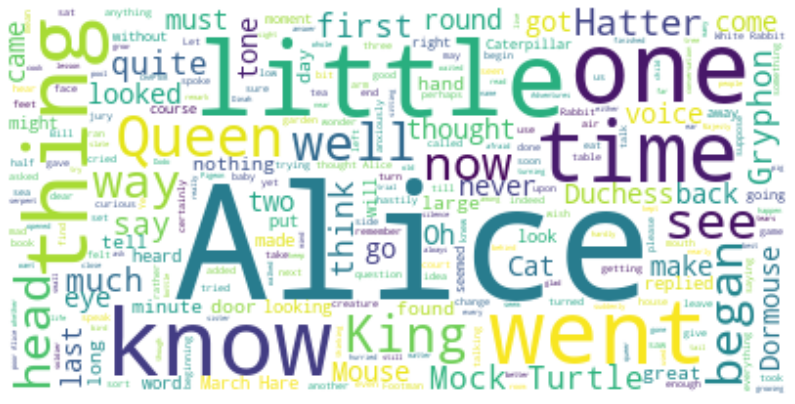

In [25]:
stopwords.add('said')

alice_wc.generate(alice_novel)

fig = plt.figure(figsize= (14, 18))
plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [26]:
# save mask to alice_mask
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

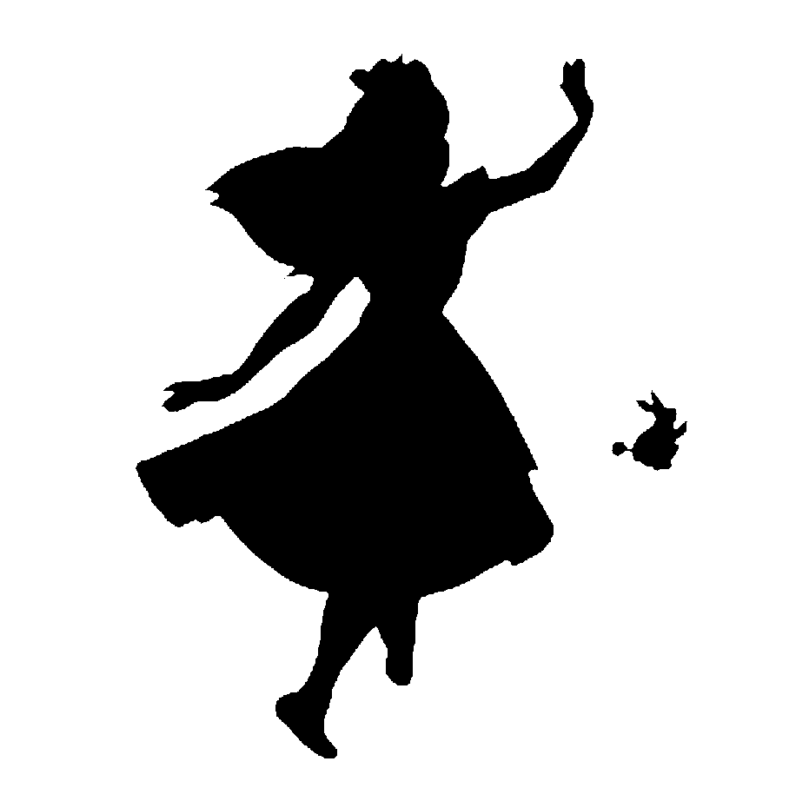

In [27]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

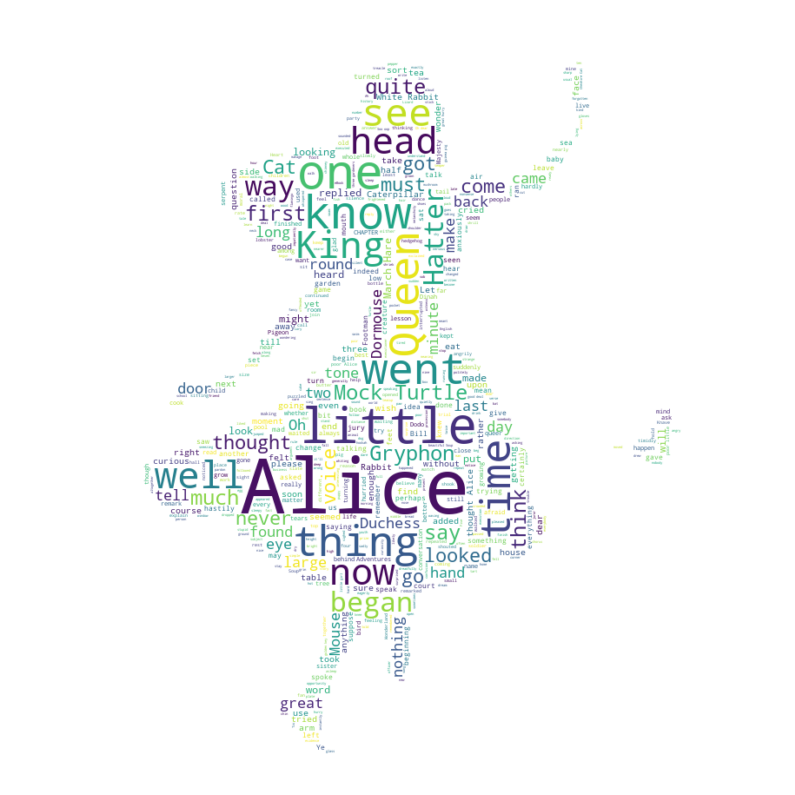

In [28]:
alice_wc = WordCloud(background_color = 'white', max_words = 2000, mask = alice_mask,
                    stopwords= stopwords)
alice_wc.generate(alice_novel)

fig =plt.figure(figsize=(14, 18))
plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Really impressive!

Unfortunately, our immigration data does not have any text data, but where there is a will there is a way. Let's generate sample text data from our immigration dataset, say text data of 90 words.

Let's recall how our data looks like.

In [29]:
df_can.head()

,Type,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58639.0
Albania,Immigrants,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15699.0
Algeria,Immigrants,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69439.0
American Samoa,Immigrants,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
Andorra,Immigrants,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


And what was the total immigration from 1980 to 2013?

In [61]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153.0

Using countries with single-word names, let's duplicate each country's name based on how much they contribute to the total immigration.

In [62]:
max_word=90
word_string = ''
for country in df_can.index.values:
    #check if country's name is a single word
    if country.count(" ")==0:
        repeat_num_times = int((df_can.loc[country, 'Total'] /total_immigration)* max_word)
        word_string = word_string +((country + ' ')*repeat_num_times)
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [63]:
wordcloud= WordCloud(background_color='white').generate(word_string)
print('word cloud created !')

word cloud created !


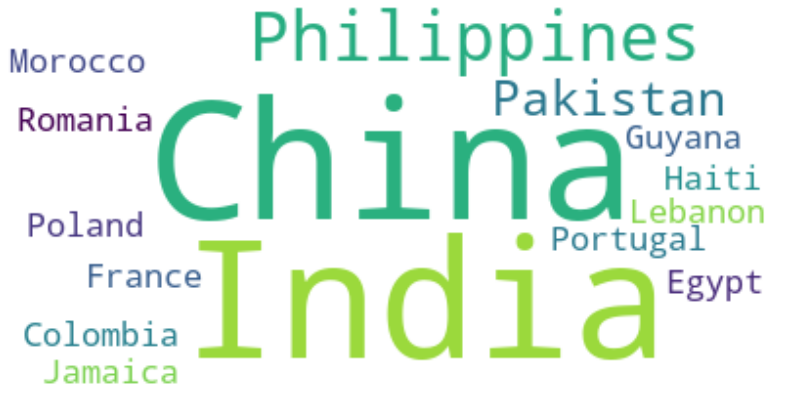

In [64]:
plt.figure(figsize=(14, 18))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## REGRESSION PLOTS
# SEABORN

In [65]:
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


In [66]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


With seaborn, generating a regression plot is as simple as calling the regplot function.

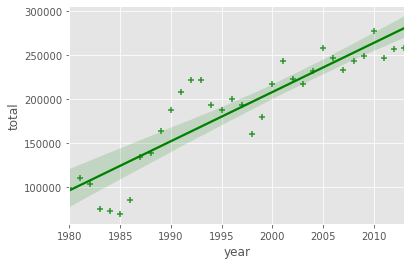

In [67]:
sns.regplot(x= 'year', y = 'total', data = df_tot, color = 'green', marker='+')
plt.show()

Text(0.5, 1.0, 'Total immigration to Canada from 1990-2013')

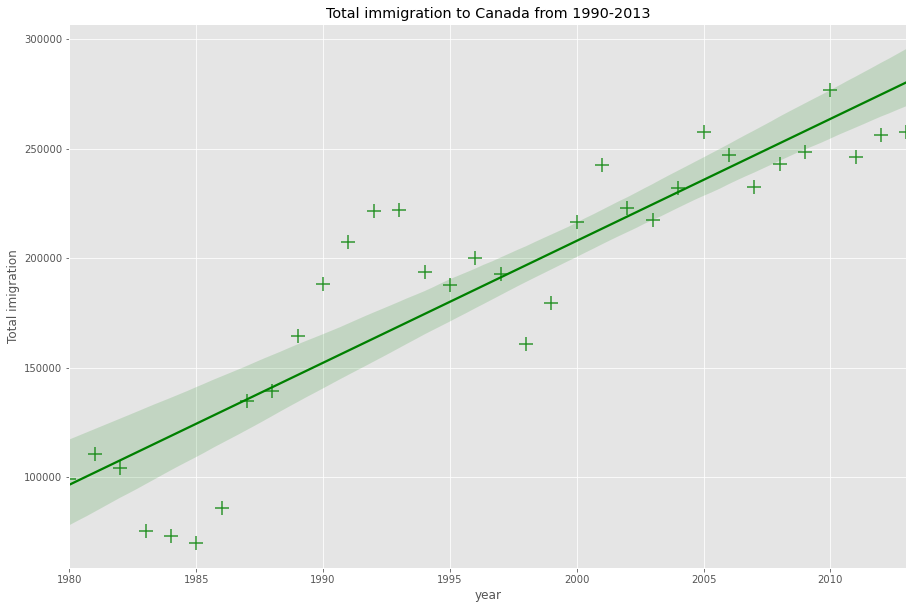

In [68]:
fig = plt.figure(figsize=(15,10))
ax = sns.regplot(x = 'year', y = 'total', data = df_tot, color = 'green', marker='+',scatter_kws = {'s':200} )
ax.set(xlabel='year', ylabel ='Total imigration')
ax.set_title('Total immigration to Canada from 1990-2013')

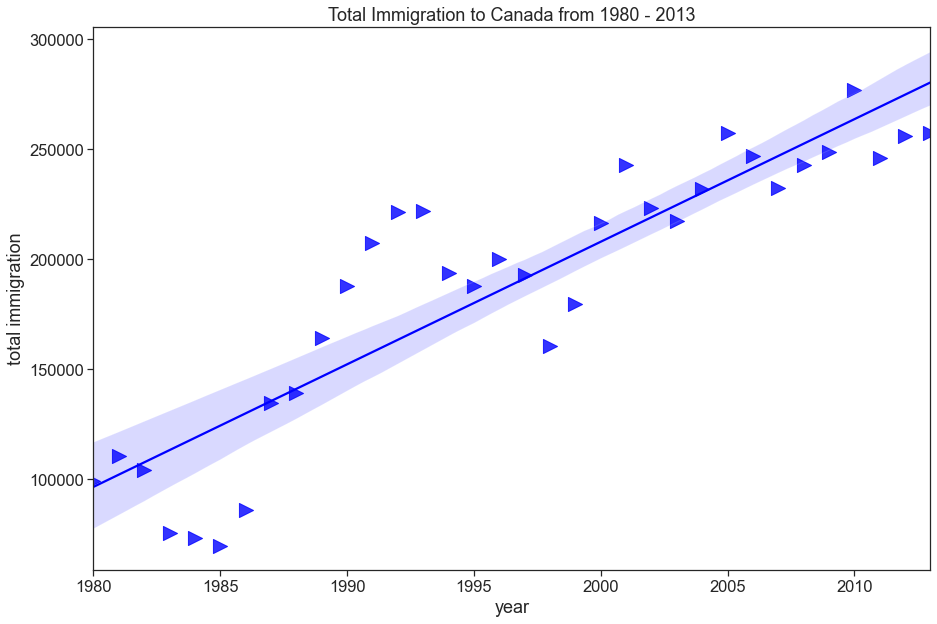

In [69]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('ticks') # change backgroud to white background

ax = sns.regplot(x='year', y='total', data = df_tot, marker='>', color='blue', scatter_kws = {'s': 200})
ax.set(xlabel= 'year', ylabel = 'total immigration')
ax.set_title("Total Immigration to Canada from 1980 - 2013")
plt.show()

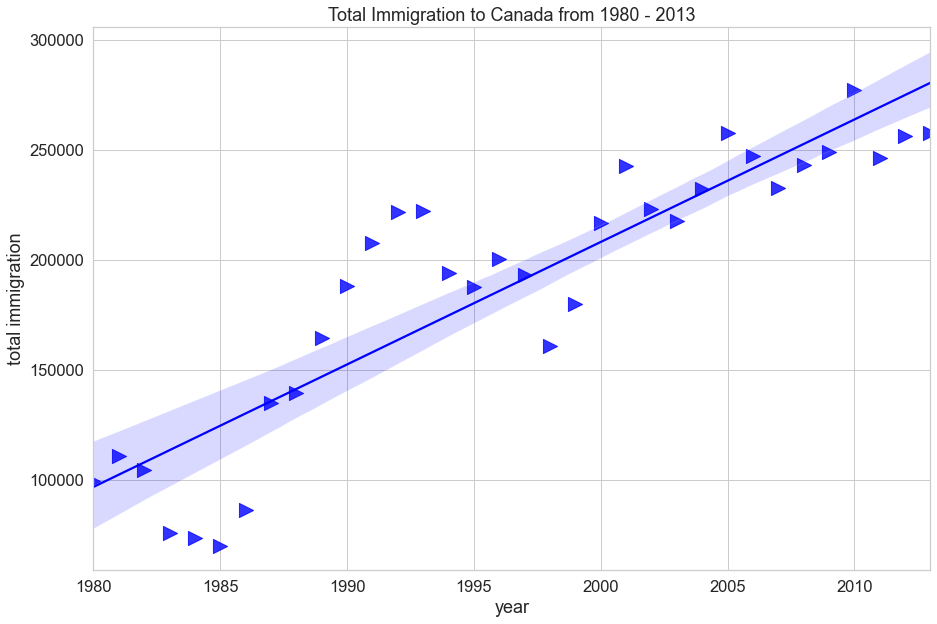

In [70]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid') # change backgroud to white background

ax = sns.regplot(x='year', y='total', data = df_tot, marker='>', color='blue', scatter_kws = {'s': 200})
ax.set(xlabel= 'year', ylabel = 'total immigration')
ax.set_title("Total Immigration to Canada from 1980 - 2013")
plt.show()

Text(0.5, 1.0, 'Total immigration to Canada fro Denmark, sweden and Norway from 1980-2013')

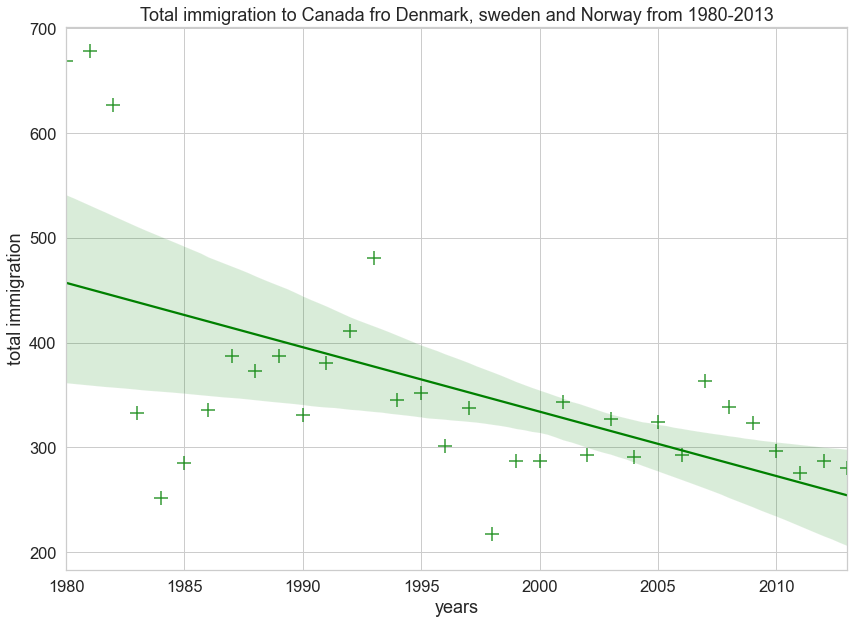

In [82]:
df_DSN = df_can.loc[['Denmark', 'Sweden', 'Norway'], years].transpose()
df_total = pd.DataFrame(df_DSN.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns= ['year', 'total']
df_total['year'] = df_total['year'].astype(int)


plt.figure(figsize=(14,10))
sns.set(font_scale= 1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y = 'total', data = df_total, color= 'green',  marker = '+', scatter_kws = {'s':200})
ax.set(xlabel= 'years', ylabel='total immigration')
ax.set_title('Total immigration to Canada fro Denmark, sweden and Norway from 1980-2013')
